# 01.a. Enchancement and Segmentation - Single Image

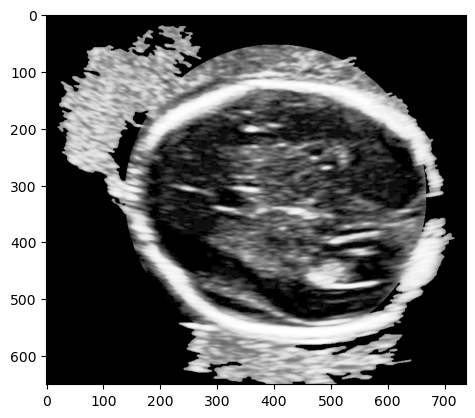

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ultrasound image
img = cv2.imread('/Users/ankitasarkar/Desktop/05. Works/Patient00216_Plane3_2_of_5.jpg', 0)  
# Read the image as grayscale

# Apply histogram equalization to enhance contrast
equalized_img = cv2.equalizeHist(img)

# Apply median blur for noise reduction
median_blur = cv2.medianBlur(equalized_img, 5)

# Thresholding to create a binary mask of the cranium and brain
_, cranium_brain_mask = cv2.threshold(median_blur, 180, 255, cv2.THRESH_BINARY)

# Find contours in the mask
contours, _ = cv2.findContours(cranium_brain_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the largest area
max_contour = max(contours, key=cv2.contourArea)

# Create a blank mask image
mask_image = np.zeros_like(img)

# Draw the largest contour on the mask
cv2.drawContours(mask_image, [max_contour], -1, (255), thickness=cv2.FILLED)

# Create a circular mask centered at the image center
center_x = img.shape[1] // 2
center_y = img.shape[0] // 2
radius = int(min(img.shape) * 0.4)  # Adjust the radius as needed
cv2.circle(mask_image, (center_x, center_y), radius, (255), thickness=cv2.FILLED)

# Apply the mask to the original image
output_image = cv2.bitwise_and(img, mask_image)

# Find the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(max_contour)

# Add padding to the bounding box
padding = 20  # Adjust the padding size as needed
x -= padding
y -= padding
w += 2 * padding
h += 2 * padding

# Ensure the bounding box is within the image boundaries
x = max(0, x)
y = max(0, y)
w = min(w, img.shape[1] - x)
h = min(h, img.shape[0] - y)

# Crop the output image to the bounding box region
output_image = output_image[y:y+h, x:x+w]

# Enhance the output image
enhanced_image = cv2.equalizeHist(output_image)

# Display the enhanced output
plt.imshow(enhanced_image, cmap='gray')
plt.show()


# 01.a. Enchancement and Segmentation - Zenodo Data set of 3092 Images 

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Input and output folder paths
input_folder = '/Users/ankitasarkar/Desktop/05. Works/01.JPG_Image'
output_folder = '/Users/ankitasarkar/Desktop/05. Works/02.Enhancement and Segmentation'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    # Read the image as grayscale
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path, 0)

    # Apply histogram equalization to enhance contrast
    equalized_img = cv2.equalizeHist(img)

    # Apply median blur for noise reduction
    median_blur = cv2.medianBlur(equalized_img, 5)

    # Thresholding to create a binary mask of the cranium and brain
    _, cranium_brain_mask = cv2.threshold(median_blur, 180, 255, cv2.THRESH_BINARY)

    # Find contours in the mask
    contours, _ = cv2.findContours(cranium_brain_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
    max_contour = max(contours, key=cv2.contourArea)

    # Create a blank mask image
    mask_image = np.zeros_like(img)

    # Draw the largest contour on the mask
    cv2.drawContours(mask_image, [max_contour], -1, (255), thickness=cv2.FILLED)

    # Create a circular mask centered at the image center
    center_x = img.shape[1] // 2
    center_y = img.shape[0] // 2
    radius = int(min(img.shape) * 0.4)  # Adjust the radius as needed
    cv2.circle(mask_image, (center_x, center_y), radius, (255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    output_image = cv2.bitwise_and(img, mask_image)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(max_contour)

    # Add padding to the bounding box
    padding = 20  # Adjust the padding size as needed
    x -= padding
    y -= padding
    w += 2 * padding
    h += 2 * padding

    # Ensure the bounding box is within the image boundaries
    x = max(0, x)
    y = max(0, y)
    w = min(w, img.shape[1] - x)
    h = min(h, img.shape[0] - y)

    # Crop the output image to the bounding box region
    output_image = output_image[y:y+h, x:x+w]

    # Enhance the output image
    enhanced_image = cv2.equalizeHist(output_image)

    # Save the enhanced output image
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, enhanced_image)

    

print("Processing completed.")


Processing completed.


In [ ]:
# Original Enhancement Code 

In [7]:
import cv2
import numpy as np
import os

# Source directory containing the images
source_directory = '/Users/ankitasarkar/Desktop/05. Works/01.JPG_Image'


# Output directory to save the results
output_directory = '/Users/ankitasarkar/Desktop/05. Works/02.Enhancement and Segmentation'


# Loop over all the images in the source directory
for filename in os.listdir(source_directory):
    image_path = os.path.join(source_directory, filename)

    # Read the image
    input_img = cv2.imread(image_path)
    
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Apply median blur
    median_blur = cv2.medianBlur(img_gray, 5)

    # Apply Laplacian
    laplacian_out = cv2.Laplacian(median_blur, cv2.CV_8U, -1)

    # Sharpen the image
    img_sharpened = cv2.addWeighted(img_gray, 1.5, laplacian_out, -0.5, 0)

    # Create a mask using Sobel operator
    sobel_x = cv2.Sobel(median_blur, cv2.CV_16S, 1, 0, ksize=-1)
    sobel_x_abs = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.Sobel(median_blur, cv2.CV_16S, 0, 1, ksize=-1)
    sobel_y_abs = cv2.convertScaleAbs(sobel_y)
    mask_image = cv2.bitwise_and(sobel_x_abs, sobel_y_abs)

    # Combine the sharpened image and mask
    final = cv2.addWeighted(img_sharpened, 1, mask_image, 0.5, 0)

    # Save the final image to the output directory
    output_path = os.path.join(output_directory, filename)
    cv2.imwrite(output_path, final)

# 02. Segregation

In [11]:
import pandas as pd
import os
import shutil

# Path to the dataset folder containing the images
dataset_folder = '/Users/ankitasarkar/Desktop/05. Works/02.Enhancement and Segmentation'

# Path to the Excel file
excel_file = '/Users/ankitasarkar/Desktop/05. Works/00. Misc/FETAL_PLANES_DB_data v1.1.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Create the three separate folders for each plane
output_folder_plane1 = '/Users/ankitasarkar/Desktop/05. Works/03. Segregation/01_Cere'
output_folder_plane2 = '/Users/ankitasarkar/Desktop/05. Works/03. Segregation/02_Thalam'
output_folder_plane3 = '/Users/ankitasarkar/Desktop/05. Works/03. Segregation/03_Ventri'

# Create the output folders if they don't exist
os.makedirs(output_folder_plane1, exist_ok=True)
os.makedirs(output_folder_plane2, exist_ok=True)
os.makedirs(output_folder_plane3, exist_ok=True)

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    image_name = row['Image Name']
    plane_name = row['Plane Name']

    # Determine the destination folder based on the plane name
    if plane_name == 'Trans-cerebellum':
        destination_folder = output_folder_plane1
    elif plane_name == 'Trans-thalamic':
        destination_folder = output_folder_plane2
    elif plane_name == 'Trans-ventricular':
        destination_folder = output_folder_plane3
    else:
        # Skip the image if the plane name is not recognized
        continue

    # Construct the source and destination paths
    source_path = os.path.join(dataset_folder, image_name)
    destination_path = os.path.join(destination_folder, image_name)

    # Copy the image to the destination folder
    shutil.copy2(source_path, destination_path)

print('Images segregation complete.')


Images segregation complete.


# 03. Classification

In [12]:
import os
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

2023-06-07 13:09:14.522550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 03. Training the Model

## 03.a. Trans_Cerebellum Plane

2023-06-07 13:15:11.289066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
3/3 [==============================] - 6s 2s/step - loss: 0.0361 - val_loss: 0.0132
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 0.0142 - val_loss: 0.0115
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 0.0118 - val_loss: 0.0100
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 0.0106 - val_loss: 0.0081
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 0.0084 - val_loss: 0.0073
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 0.0078 - val_loss: 0.0073
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.0073 - val_loss: 0.0061
Epoch 8/30
3/3 [==============================] - 6s 2s/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/30
3/3 [==============================] - 6s 2s/step - loss: 0.0063 - val_loss: 0.0054
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 0.0058 - val_loss: 0.0055
Epoch 11/30
3/3 [==============================] 

INFO:tensorflow:Assets written to: /Users/ankitasarkar/Desktop/Model_Archi_Weight/assets


INFO:tensorflow:Assets written to: /Users/ankitasarkar/Desktop/Model_Archi_Weight/assets


1/1 [==============================] - 0s 278ms/step


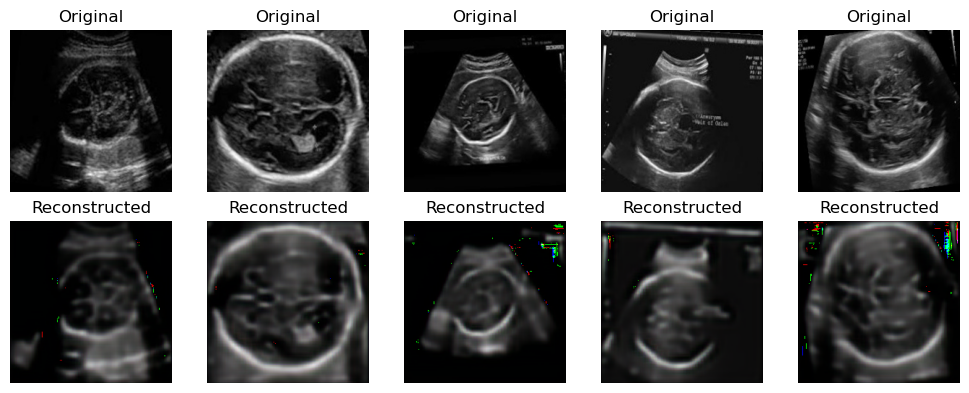

In [13]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Path to the folder containing the ultrasound images
images_folder = '/Users/ankitasarkar/Desktop/05. Works/00. Misc/Resized'

# Load and preprocess the ultrasound images
images = []
for filename in os.listdir(images_folder):
    if filename.endswith(".DS_Store"):
        continue
    
    image_path = os.path.join(images_folder, filename)
    
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image.astype('float32') / 255.0
        images.append(image)
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(e)

images = np.array(images)

# Split the dataset into training and testing sets
train_images, test_images = train_test_split(images, test_size=0.1, random_state=42)

# Rest of the code...
# Create the autoencoder model
model = models.Sequential([
    # Encoder
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    # Decoder
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(3, (3, 3), activation='linear', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_images, train_images, epochs=30, batch_size=32, validation_data=(test_images, test_images))

# Evaluate the model
mse = model.evaluate(test_images, test_images, verbose=0)
print('Mean Squared Error:', mse)

# Save the model's architecture and weights
model.save('/Users/ankitasarkar/Desktop/Model_Archi_Weight')

# Generate reconstructed images
reconstructed_images = model.predict(test_images)

# Scale the reconstructed images back to the original range
reconstructed_images = reconstructed_images * 255.0

# Visualize original and reconstructed images
import matplotlib.pyplot as plt

n = 5  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i])
    plt.title('Original')
    plt.axis('off')
    
    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].astype('uint8'))  # Convert to uint8 for correct visualization
    plt.title('Reconstructed')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
#NEW: MODEL

In [15]:
from tensorflow.keras.models import load_model

# Load the trained model
model_path = '/Users/ankitasarkar/Desktop/Model_Archi_Weight'
model = load_model(model_path)


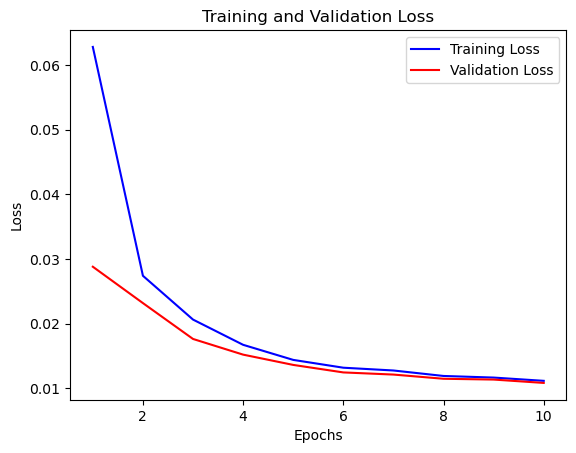

In [44]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 03.a. Trans_Cerebellum Plane

In [45]:
import os
import cv2
import numpy as np

# Path to the folder containing the new ultrasound images
new_images_folder = '/Users/ankitasarkar/Desktop/05. Works/03. Segregation/01_Cere'


# Load and preprocess the new ultrasound images
new_images = []
image_names = []

for filename in os.listdir(new_images_folder):
    if filename.endswith(".DS_Store"):
        continue

    image_path = os.path.join(new_images_folder, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32') / 255.0

    new_images.append(image)
    image_names.append(filename)

new_images = np.array(new_images)


In [46]:
# Initialize counters
normal_count = 0
abnormal_count = 0

# Predict the labels for the new images
predictions = model.predict(new_images)

# Threshold to classify as normal or abnormal
threshold = 0.15  # Adjust the threshold as needed

for i in range(len(predictions)):
    if predictions[i].mean() < threshold:
        print(f"{image_names[i]}: Abnormal")
        abnormal_count += 1
    else:
        print(f"{image_names[i]}: Normal")
        normal_count += 1

# Print the count of normal and abnormal predictions
print("Normal Count:", normal_count)
print("Abnormal Count:", abnormal_count)


23/23 [==============================] - 16s 663ms/step
Patient00901_Plane3_5_of_5.jpg: Normal
Patient01699_Plane3_2_of_2.jpg: Normal
Patient01046_Plane3_1_of_3.jpg: Normal
Patient01607_Plane3_2_of_2.jpg: Normal
Patient01323_Plane3_8_of_8.jpg: Normal
Patient01551_Plane3_3_of_4.jpg: Normal
Patient00902_Plane3_2_of_5.jpg: Abnormal
Patient00902_Plane3_3_of_5.jpg: Normal
Patient01155_Plane3_2_of_6.jpg: Normal
Patient01655_Plane3_3_of_3.jpg: Normal
Patient01590_Plane3_6_of_6.jpg: Normal
Patient01596_Plane3_1_of_5.jpg: Normal
Patient00714_Plane3_3_of_8.jpg: Normal
Patient00851_Plane3_3_of_3.jpg: Normal
Patient00850_Plane3_2_of_4.jpg: Normal
Patient01402_Plane3_3_of_3.jpg: Normal
Patient00778_Plane3_5_of_5.jpg: Normal
Patient00736_Plane3_4_of_5.jpg: Normal
Patient01706_Plane3_3_of_4.jpg: Normal
Patient01052_Plane3_1_of_9.jpg: Normal
Patient00964_Plane3_3_of_4.jpg: Normal
Patient01536_Plane3_2_of_3.jpg: Normal
Patient01481_Plane3_3_of_4.jpg: Normal
Patient00996_Plane3_1_of_2.jpg: Normal
Patien

## 03.b. Trans-thalamic Plane

In [41]:
import os
import cv2
import numpy as np

# Path to the folder containing the new ultrasound images
new_images_folder = '/Users/ankitasarkar/Desktop/05. Works/03. Segregation/02_Thalam'


# Load and preprocess the new ultrasound images
new_images = []
image_names = []

for filename in os.listdir(new_images_folder):
    if filename.endswith(".DS_Store"):
        continue

    image_path = os.path.join(new_images_folder, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32') / 255.0

    new_images.append(image)
    image_names.append(filename)

new_images = np.array(new_images)


In [42]:
# Initialize counters
normal_count = 0
abnormal_count = 0

# Predict the labels for the new images
predictions = model.predict(new_images)

# Threshold to classify as normal or abnormal
threshold = 0.15  # Adjust the threshold as needed

for i in range(len(predictions)):
    if predictions[i].mean() < threshold:
        print(f"{image_names[i]}: Abnormal")
        abnormal_count += 1
    else:
        print(f"{image_names[i]}: Normal")
        normal_count += 1

# Print the count of normal and abnormal predictions
print("Normal Count:", normal_count)
print("Abnormal Count:", abnormal_count)


52/52 [==============================] - 37s 698ms/step
Patient01573_Plane3_1_of_2.jpg: Normal
Patient01682_Plane3_4_of_6.jpg: Normal
Patient01676_Plane3_1_of_3.jpg: Normal
Patient01310_Plane3_1_of_5.jpg: Normal
Patient01682_Plane3_5_of_6.jpg: Abnormal
Patient01464_Plane3_2_of_2.jpg: Normal
Patient00640_Plane3_1_of_1.jpg: Abnormal
Patient00722_Plane3_1_of_5.jpg: Normal
Patient01396_Plane3_1_of_1.jpg: Normal
Patient01624_Plane3_1_of_2.jpg: Normal
Patient00808_Plane3_1_of_2.jpg: Normal
Patient01256_Plane3_4_of_4.jpg: Normal
Patient00846_Plane3_1_of_2.jpg: Normal
Patient01172_Plane3_1_of_3.jpg: Normal
Patient01393_Plane3_1_of_2.jpg: Abnormal
Patient01155_Plane3_3_of_6.jpg: Normal
Patient01492_Plane3_1_of_1.jpg: Normal
Patient01655_Plane3_2_of_3.jpg: Normal
Patient00814_Plane3_1_of_3.jpg: Normal
Patient00766_Plane3_3_of_3.jpg: Normal
Patient00979_Plane3_2_of_2.jpg: Abnormal
Patient01531_Plane3_5_of_7.jpg: Normal
Patient01738_Plane3_1_of_2.jpg: Normal
Patient01531_Plane3_4_of_7.jpg: Normal


Patient01139_Plane3_3_of_6.jpg: Normal
Patient01102_Plane3_1_of_2.jpg: Normal
Patient00921_Plane3_2_of_3.jpg: Normal
Patient00815_Plane3_2_of_3.jpg: Normal
Patient01409_Plane3_3_of_4.jpg: Normal
Patient01392_Plane3_2_of_2.jpg: Normal
Patient01036_Plane3_1_of_2.jpg: Abnormal
Patient01151_Plane3_5_of_13.jpg: Normal
Patient01361_Plane3_1_of_2.jpg: Normal
Patient01173_Plane3_3_of_3.jpg: Normal
Patient01173_Plane3_2_of_3.jpg: Normal
Patient01494_Plane3_4_of_4.jpg: Normal
Patient01711_Plane3_2_of_2.jpg: Normal
Patient01045_Plane3_5_of_5.jpg: Normal
Patient01276_Plane3_2_of_2.jpg: Abnormal
Patient00794_Plane3_2_of_3.jpg: Normal
Patient01236_Plane3_1_of_1.jpg: Normal
Patient01693_Plane3_2_of_2.jpg: Normal
Patient01307_Plane3_1_of_2.jpg: Normal
Patient00959_Plane3_4_of_4.jpg: Normal
Patient01306_Plane3_1_of_4.jpg: Normal
Patient00767_Plane3_1_of_3.jpg: Normal
Patient01721_Plane3_2_of_6.jpg: Normal
Patient01451_Plane3_1_of_3.jpg: Normal
Patient01532_Plane3_1_of_1.jpg: Normal
Patient00823_Plane3_

## 03.c. Trans_Ventricular Plane

In [38]:
import os
import cv2
import numpy as np

# Path to the folder containing the new ultrasound images
new_images_folder = '/Users/ankitasarkar/Desktop/05. Works/03. Segregation/03_Ventri'


# Load and preprocess the new ultrasound images
new_images = []
image_names = []

for filename in os.listdir(new_images_folder):
    if filename.endswith(".DS_Store"):
        continue

    image_path = os.path.join(new_images_folder, filename)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32') / 255.0

    new_images.append(image)
    image_names.append(filename)

new_images = np.array(new_images)


In [39]:
# Initialize counters
normal_count = 0
abnormal_count = 0

# Predict the labels for the new images
predictions = model.predict(new_images)

# Threshold to classify as normal or abnormal
threshold = 0.15  # Adjust the threshold as needed

for i in range(len(predictions)):
    if predictions[i].mean() < threshold:
        print(f"{image_names[i]}: Abnormal")
        abnormal_count += 1
    else:
        print(f"{image_names[i]}: Normal")
        normal_count += 1

# Print the count of normal and abnormal predictions
print("Normal Count:", normal_count)
print("Abnormal Count:", abnormal_count)


19/19 [==============================] - 12s 630ms/step
Patient00901_Plane3_4_of_5.jpg: Normal
Patient01698_Plane3_2_of_4.jpg: Normal
Patient01118_Plane3_4_of_6.jpg: Normal
Patient01698_Plane3_3_of_4.jpg: Normal
Patient01118_Plane3_5_of_6.jpg: Normal
Patient01343_Plane3_1_of_2.jpg: Normal
Patient00847_Plane3_1_of_4.jpg: Normal
Patient01551_Plane3_2_of_4.jpg: Normal
Patient01777_Plane3_1_of_4.jpg: Normal
Patient00766_Plane3_2_of_3.jpg: Normal
Patient01301_Plane3_4_of_7.jpg: Normal
Patient01724_Plane3_1_of_3.jpg: Abnormal
Patient01421_Plane3_1_of_2.jpg: Normal
Patient00714_Plane3_2_of_8.jpg: Normal
Patient01165_Plane3_2_of_2.jpg: Normal
Patient00851_Plane3_2_of_3.jpg: Normal
Patient01179_Plane3_2_of_3.jpg: Normal
Patient01384_Plane3_3_of_3.jpg: Normal
Patient01384_Plane3_2_of_3.jpg: Normal
Patient01179_Plane3_3_of_3.jpg: Normal
Patient01663_Plane3_4_of_5.jpg: Normal
Patient01001_Plane3_4_of_4.jpg: Normal
Patient01178_Plane3_2_of_4.jpg: Normal
Patient00717_Plane3_1_of_3.jpg: Normal
Patien